In [7]:
import pandas as pd

In [8]:
# Load the dataset
file_path = "Heart_Disease_Prediction.csv"
df = pd.read_csv(file_path)

In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [10]:
print(df.head())

   Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0   70    1                4  130          322             0            2   
1   67    0                3  115          564             0            2   
2   57    1                2  124          261             0            0   
3   64    1                4  128          263             0            0   
4   74    0                2  120          269             0            2   

   Max HR  Exercise angina  ST depression  Slope of ST  \
0     109                0            2.4            2   
1     160                0            1.6            2   
2     141                0            0.3            1   
3     105                1            0.2            2   
4     121                1            0.2            1   

   Number of vessels fluro  Thallium Heart Disease  
0                        3         3      Presence  
1                        0         7       Absence  
2                        0   

In [11]:
#convert them to numbers:

#Presence → 1
#Absence → 0

# Convert 'Heart Disease' column to numerical values
df['Heart Disease'] = df['Heart Disease'].map({'Absence': 0, 'Presence': 1})

# Check if the conversion worked
print(df['Heart Disease'].value_counts())

Heart Disease
0    150
1    120
Name: count, dtype: int64


Matplotlib is building the font cache; this may take a moment.


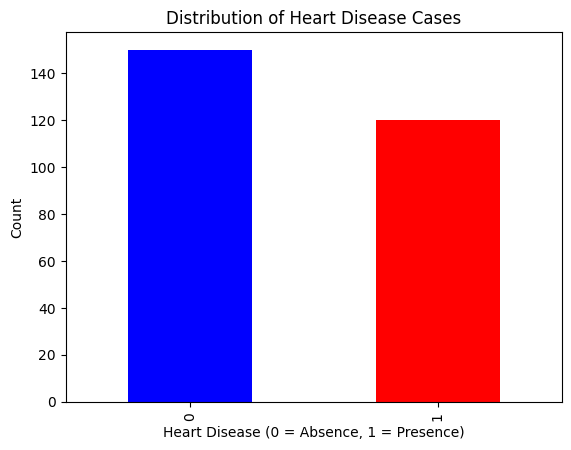

In [6]:
import matplotlib.pyplot as plt

# Plot the distribution of the target variable
df['Heart Disease'].value_counts().plot(kind='bar', color=['blue', 'red'])
plt.xlabel("Heart Disease (0 = Absence, 1 = Presence)")
plt.ylabel("Count")
plt.title("Distribution of Heart Disease Cases")
plt.show()


In [12]:
# Check for missing values
print(df.isnull().sum())


Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64


In [13]:
# Define features (X) and target variable (y)
X = df.drop(columns=['Heart Disease'])  # Drop target column
y = df['Heart Disease']  # Target variable


In [14]:
from sklearn.model_selection import train_test_split

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the datasets
print(f"Training set: {X_train.shape}, Testing set: {X_test.shape}")


Training set: (216, 13), Testing set: (54, 13)


In [15]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit on training data and transform both train & test data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Print shape to confirm
print(f"Scaled Training Data Shape: {X_train.shape}")
print(f"Scaled Testing Data Shape: {X_test.shape}")


Scaled Training Data Shape: (216, 13)
Scaled Testing Data Shape: (54, 13)


In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# Initialize and train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate accuracy
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")


Random Forest Accuracy: 0.76


In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score

# Train the model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Calculate precision and recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)


Precision: 0.9375
Recall: 0.7142857142857143


In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Train the model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Calculate RMSE and R²
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R²:", r2)


RMSE: 0.37435623755000075
R²: 0.41030909090909096
